In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from glob import glob 
import os as os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##CH1 mCherry-NLS
##CH2 FOXC1-Achilles
##CH3 Trans

ingeo_colours = ["#0077BB","#33BBEE","#009988","#EE7733","#CC3311","#EE3377","#BBBBBB","#5D54A4"]



In [2]:
fns = list(sorted(glob(os.path.join(os.getcwd(),f"Composite/*.csv"))))
fns


['/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B10_P1_batch.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B10_P1_tracks.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B11_P1_batch.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B11_P1_tracks.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B11_P2_batch.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B11_P2_tracks.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B11_P3_batch.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B11_P3_tracks.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B4_P1_tracks.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B5_P1_tracks.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/B8_P1_tracks.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/C10_P1_batch.csv',
 '/Volumes/lab-santoss/home/shared/EC-OI/Batch_4/Composite/C

In [3]:
dfs = [pd.read_csv(x).iloc[3:] for x in fns]
dfs = [dfs[i].assign(Position=fns[i].split('/').pop()[0:5]) for i in range(len(fns))]

trackmate_data = pd.concat(dfs)

In [4]:
## Trackmate columns to carry over

trackmate_data = trackmate_data[['Position','LABEL', 'ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T','MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']]

trackmate_data[['ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']] = trackmate_data[['ID', 'TRACK_ID', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'MEAN_INTENSITY_CH2', 'MEDIAN_INTENSITY_CH2',
       'MIN_INTENSITY_CH2', 'MAX_INTENSITY_CH2', 'TOTAL_INTENSITY_CH2',
       'STD_INTENSITY_CH2']].astype(float)

trackmate_data = trackmate_data.reset_index()

trackmate_data['branch'] = trackmate_data.LABEL.str.split('.', 1).str[1]
trackmate_data.branch.fillna('root', inplace=True)
## Convert time to hours 
trackmate_data['Time_hours'] = trackmate_data['POSITION_T']*0.25

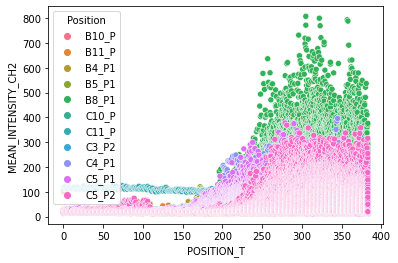

In [5]:
ax = sns.scatterplot(x="POSITION_T", y="MEAN_INTENSITY_CH2",
             data=trackmate_data, hue="Position")

In [6]:
trackmate_data["Log10_FOXC1_Achilles"] = np.log10(trackmate_data["MEAN_INTENSITY_CH2"])

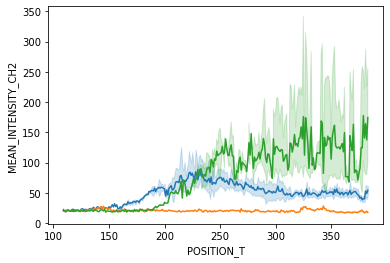

In [7]:
## Manually Tracked
track = trackmate_data.loc[(trackmate_data['Position'] == 'B4_P1') & (trackmate_data['TRACK_ID'] == 614)]

ax = sns.lineplot(x="POSITION_T", y="MEAN_INTENSITY_CH2",
             data=track)

## Manually Tracked
track = trackmate_data.loc[(trackmate_data['Position'] == 'B5_P1') & (trackmate_data['TRACK_ID'] == 306)]

ax = sns.lineplot(x="POSITION_T", y="MEAN_INTENSITY_CH2",
             data=track)

## Manually Tracked
track = trackmate_data.loc[(trackmate_data['Position'] == 'B5_P1') & (trackmate_data['TRACK_ID'] == 271)]

ax = sns.lineplot(x="POSITION_T", y="MEAN_INTENSITY_CH2",
             data=track)



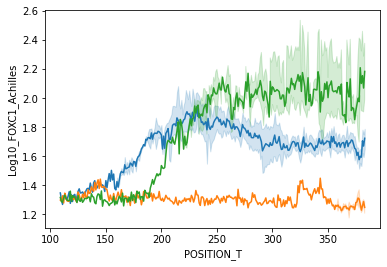

In [8]:
## Manually Tracked
track = trackmate_data.loc[(trackmate_data['Position'] == 'B4_P1') & (trackmate_data['TRACK_ID'] == 614)]

ax = sns.lineplot(x="POSITION_T", y="Log10_FOXC1_Achilles",
             data=track)

## Manually Tracked
track = trackmate_data.loc[(trackmate_data['Position'] == 'B5_P1') & (trackmate_data['TRACK_ID'] == 306)]

ax = sns.lineplot(x="POSITION_T", y="Log10_FOXC1_Achilles",
             data=track)

## Manually Tracked
track = trackmate_data.loc[(trackmate_data['Position'] == 'B5_P1') & (trackmate_data['TRACK_ID'] == 271)]

ax = sns.lineplot(x="POSITION_T", y="Log10_FOXC1_Achilles",
             data=track)


In [9]:
## Positions and tracks
Positions = ['B4_P1', 'B5_P1', 'B5_P1', 'C5_P1', 'C5_P2']
Tracks = [614, 271, 306, 1098, 1122, 1060]

In [10]:
trackmate_data_manual = list()
for p in zip(Positions, Tracks):
    trackmate_data_manual.append(trackmate_data.loc[(trackmate_data['Position'] == p[0]) & (trackmate_data['TRACK_ID'] == p[1])])
    print(p[0])    
trackmate_data_manual = pd.concat(trackmate_data_manual)

B4_P1
B5_P1
B5_P1
C5_P1
C5_P2


In [11]:
## Table of manually tracked positions and there fate 


## B4_P1
trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'B4_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 614), 'fate'] = 'SOX17+FOXC1-Ach+'

## B5_P1
trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'B5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 271 ) &
                          (trackmate_data_manual['branch'].isin(['bbaab', 'bbaaa'])), 'fate'] = 'SOX17+FOXC1-Ach+'

trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'B5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 271 ) &
                          (~trackmate_data_manual['branch'].isin(['bbaab', 'bbaaa'])), 'fate'] = 'SOX17-FOXC1+Ach+'

trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'B5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 306), 'fate'] = 'SOX17+FOXC1-Ach-'

## C5_P1
trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 1098) &
                          (trackmate_data_manual['branch'].isin(['baaa', 'baab'])), 'fate'] = 'SOX17+FOXC1-Ach+'

trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 1098) &
                          (trackmate_data_manual['branch'].isin(['abab'])), 'fate'] = 'SOX17-FOXC1+Ach+'

trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 1122), 'fate'] = 'SOX17+FOXC1-Ach-'

## C5_P2

trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'C5_P2') & 
                          (trackmate_data_manual['TRACK_ID'] == 1060), 'fate'] = 'SOX17+FOXC1-Ach+'




In [12]:
trackmate_data_manual = trackmate_data_manual.loc[(trackmate_data_manual['Position'] == 'B4_P1') & 
                          (trackmate_data_manual['TRACK_ID'] == 614)]



In [13]:
## mitosis
track_start = trackmate_data_manual.groupby(['LABEL']).min()
track_start = track_start.reset_index()
#End point
track_end = trackmate_data_manual.loc[trackmate_data_manual['POSITION_T']==383]

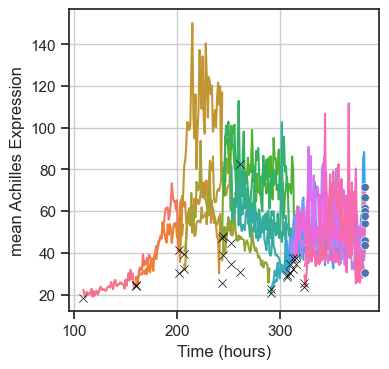

In [14]:
plt.figure(figsize=(4,4), dpi=100)
sns.set_theme(style="ticks")

#Mitosis

ax = sns.scatterplot(x="POSITION_T", y="MEAN_INTENSITY_CH2",
             data=track_start, marker="x", color="black", zorder=2)

ax = sns.scatterplot(x="POSITION_T", y="MEAN_INTENSITY_CH2",
             data=track_end, hue="fate", zorder=2)

ax = sns.lineplot(x="POSITION_T", y="MEAN_INTENSITY_CH2",
             data=trackmate_data_manual, hue='LABEL', zorder=1)

plt.xlabel(f'Time (hours)')
plt.ylabel(f'mean Achilles Expression')
plt.grid(zorder=0)  #just add this

ax.get_legend().remove()


In [15]:
All_lineages = trackmate_data_manual.branch.unique().tolist()
print(All_lineages)
All_lineages.remove('root')
Generations = len(max(trackmate_data_manual.branch.unique() , key = len))

# Given sequences
sequences = All_lineages

scale = 2

# Define a function to calculate the value for a given sequence
def calculate_value(sequence):
    value = 0
    for i, char in enumerate(sequence):
        if char == 'a':
            value += 1 / (scale ** i)
        elif char == 'b':
            value -= 1 / (scale ** i)
    return value

# Create a list to store the values for each sequence
sequence_values_list = []

# Populate the values list
for seq in sequences:
    sequence_values_list.append(calculate_value(seq))

# Print the list of sequence values
print(sequence_values_list)

trackmate_data_manual.loc[trackmate_data_manual['branch']=='root', 'branch_pos'] = 0

for i in range(0, len(sequences)):
    
    trackmate_data_manual.loc[trackmate_data_manual['branch']==sequences[i], 'branch_pos'] = sequence_values_list[i]

trackmate_data_manual.loc[trackmate_data_manual['branch']=='root', 'generation'] = 0

root = trackmate_data_manual.loc[trackmate_data_manual['branch']=='root']
rest = trackmate_data_manual.loc[trackmate_data_manual['branch']!='root']

for i in rest['branch'].unique().tolist():
    
        
    rest.loc[rest['branch']==i, 'generation'] = len(i)
    
trackmate_data_manual = pd.concat([root, rest])


track_start = trackmate_data_manual.groupby(['LABEL']).min().reset_index()[1:]

track_start = track_start.reindex(track_start.branch.str.len().sort_values().index)

def group_pairs_by_last_character(input_set):
    pairs = {}

    for item in input_set:
        key = item[:-1]  # Exclude the last character
        if key not in pairs:
            pairs[key] = [item]
        else:
            pairs[key].append(item)

    identical_pairs = []
    for pair in pairs.values():
        if len(pair) == 2 and pair[0][:-1] == pair[1][:-1]:
            identical_pairs.append(pair)

    return identical_pairs

input_set = sequences

result = group_pairs_by_last_character(input_set)
print(result)


count=1
for r in result:
    track_start.loc[track_start['branch']==r[0], 'Sisters'] = f'sisters_{count}'
    track_start.loc[track_start['branch']==r[1], 'Sisters'] = f'sisters_{count}'
    
    count=count+1

ymin_list = list()
ymax_list = list()


for s in track_start.Sisters.unique():
    
    temp_ = track_start.loc[track_start['Sisters']==s]
    
    temp_a = temp_[temp_['branch'].str.endswith('a')]
    temp_b = temp_[temp_['branch'].str.endswith('b')]
    
    
    ymax_list.append(temp_a['branch_pos'])
    ymin_list.append(temp_b['branch_pos'])



['root', 'a', 'b', 'ab', 'aa', 'ba', 'bb', 'abb', 'aba', 'aaa', 'aab', 'baa', 'bab', 'bba', 'bbb', 'abba', 'abbb', 'baab', 'baaa', 'aaba', 'aabb', 'baba', 'babb', 'aaab', 'aaaa', 'bbba', 'bbbb']
[1.0, -1.0, 0.5, 1.5, -0.5, -1.5, 0.25, 0.75, 1.75, 1.25, -0.25, -0.75, -1.25, -1.75, 0.375, 0.125, -0.375, -0.125, 1.375, 1.125, -0.625, -0.875, 1.625, 1.875, -1.625, -1.875]
[['a', 'b'], ['ab', 'aa'], ['ba', 'bb'], ['abb', 'aba'], ['aaa', 'aab'], ['baa', 'bab'], ['bba', 'bbb'], ['abba', 'abbb'], ['baab', 'baaa'], ['aaba', 'aabb'], ['baba', 'babb'], ['aaab', 'aaaa'], ['bbba', 'bbbb']]


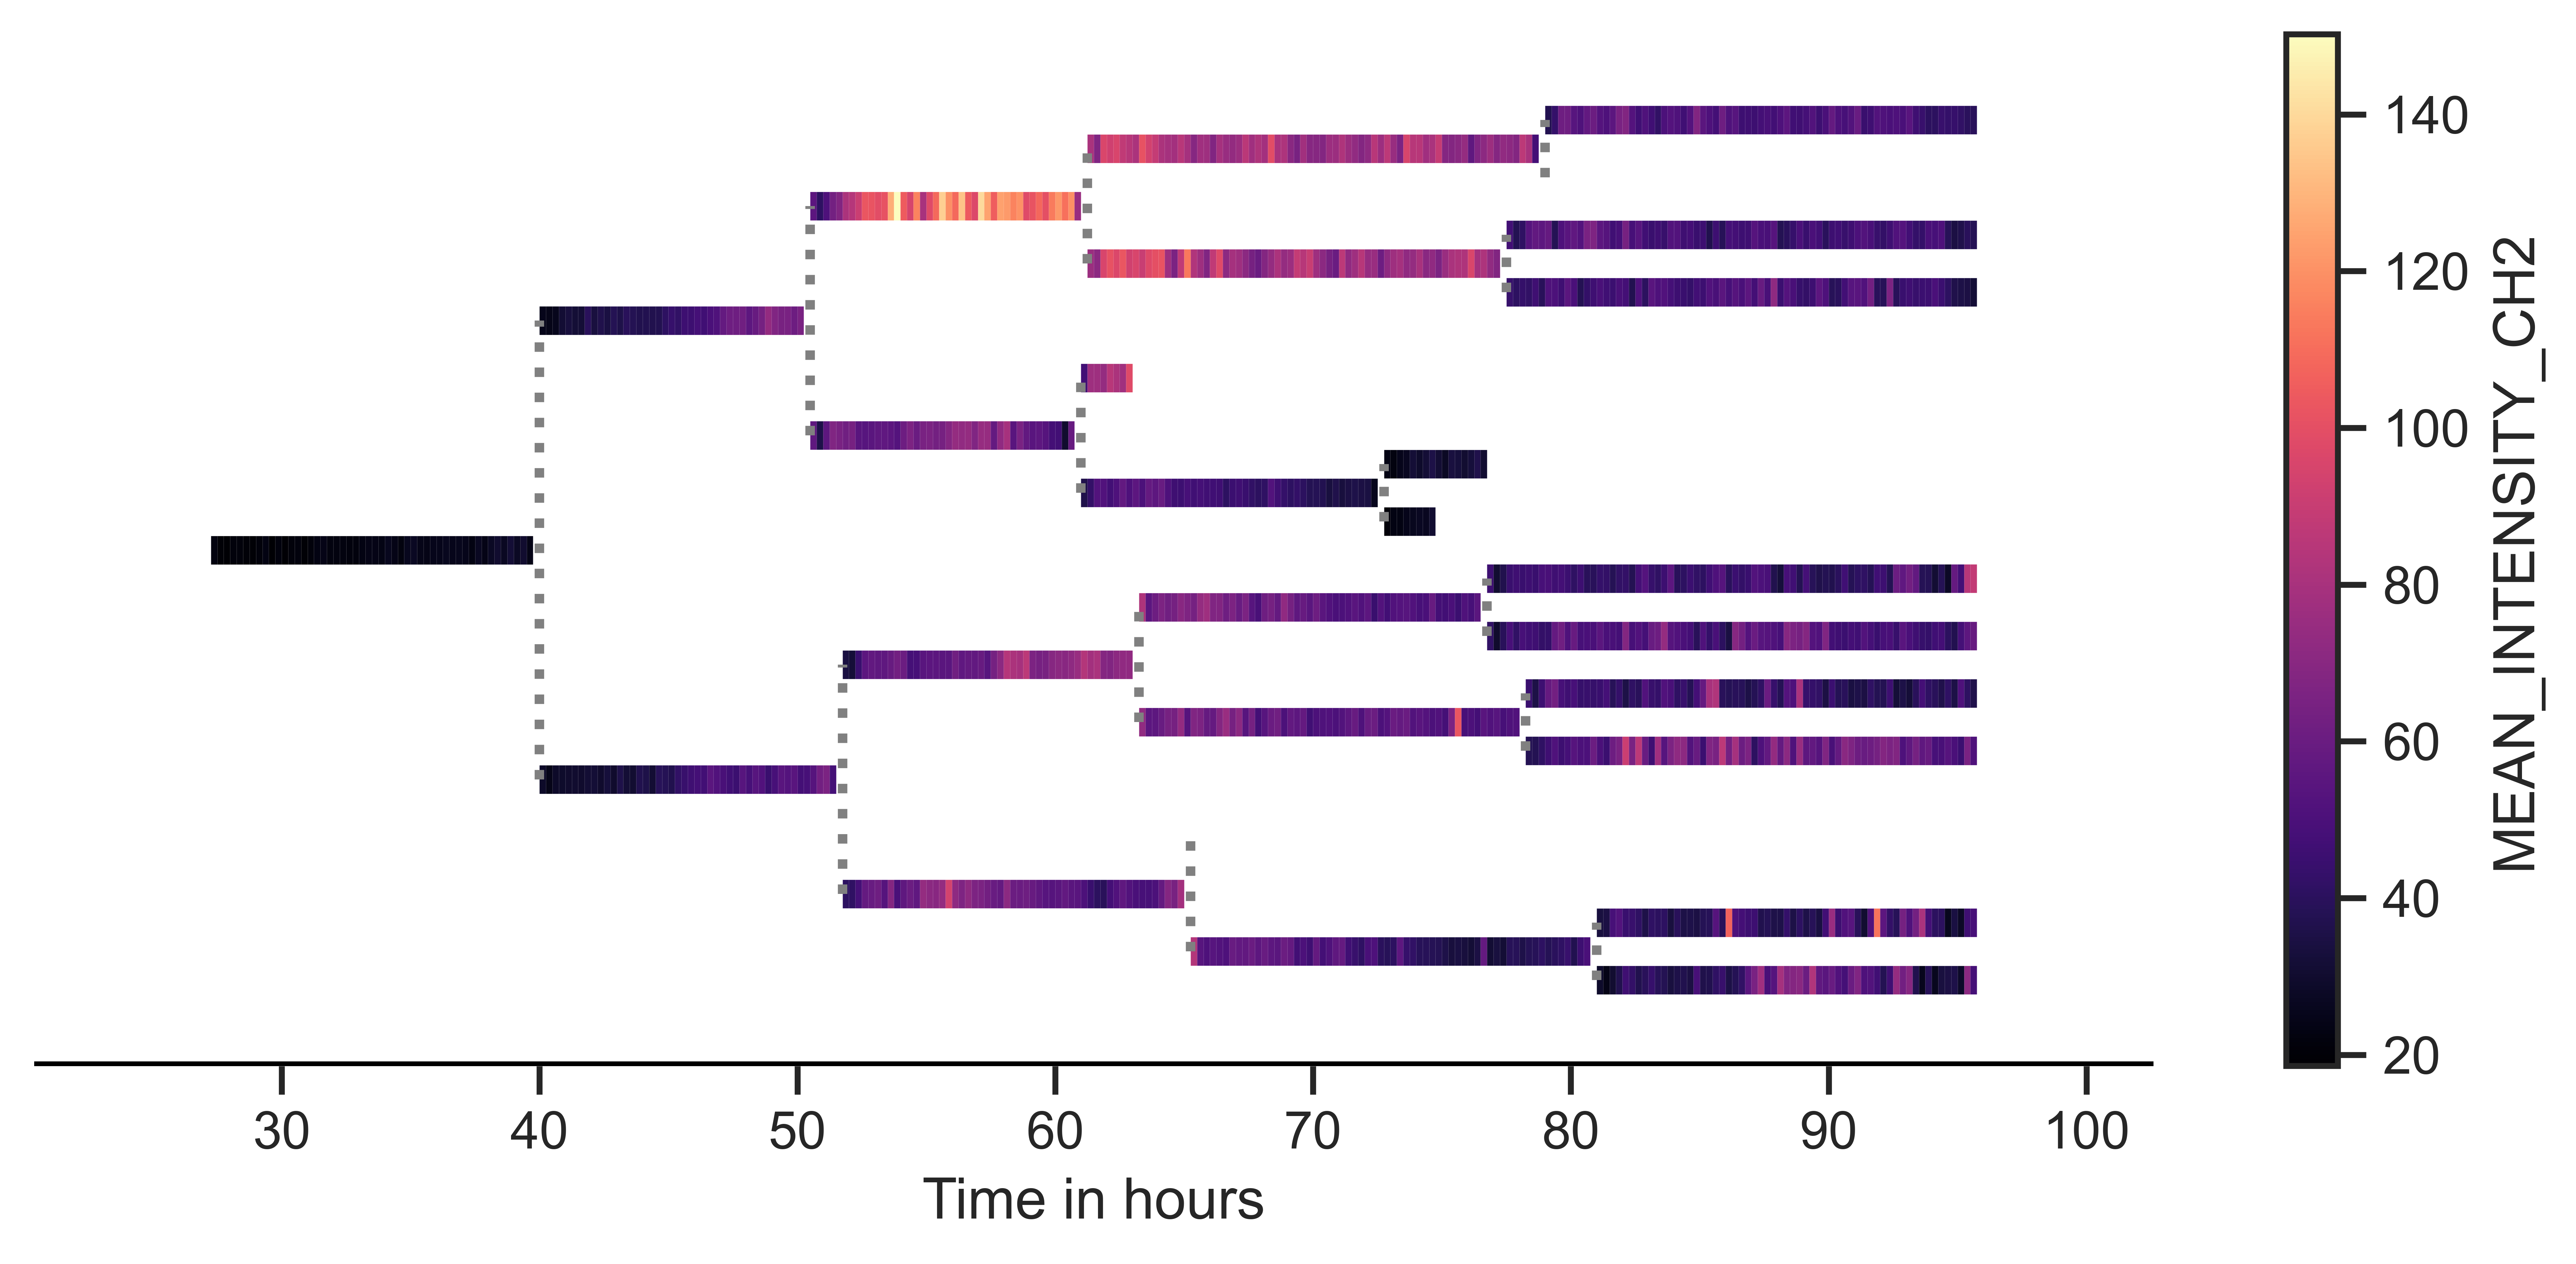

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.patches import PathPatch
import seaborn as sns
from matplotlib.lines import Line2D

# Assuming you have trackmate_data_manual DataFrame
# Assuming you have track_start DataFrame with 'Time_hours', 'branch_pos', 'ymin_list', 'ymax_list'

# Set seaborn style
sns.set(style="ticks")

variable = 'MEAN_INTENSITY_CH2'
width = 6
pal = "magma"
n_colors = 1000

#def plot_tree(variable, width, pal, n_colors, width):

# Determine the range of values for 'MEAN_INTENSITY_CH2' across all branches
min_intensity = trackmate_data_manual[variable].min()
max_intensity = trackmate_data_manual[variable].max()

# Create a color map with a gradient from red to blue and shared color scale
cmap = ListedColormap(sns.color_palette(pal, n_colors=n_colors))

# Create a figure with specified size and DPI
plt.figure(figsize=(10, 4), dpi=1000)

# Create a subplot
ax = plt.gca()

for x in trackmate_data_manual['branch'].unique():
    # Create a DataFrame for the current branch
    df = trackmate_data_manual.loc[trackmate_data_manual['branch'] == x]

    points = np.array(df[['Time_hours', 'branch_pos']]).reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, linewidth=width, norm=Normalize(min_intensity, max_intensity))
    lc.set_array(df[variable])

    # Add the LineCollection to the same set of axes
    ax.add_collection(lc)

# Set custom axis limits
x_min = trackmate_data_manual['Time_hours'].min()
x_max = trackmate_data_manual['Time_hours'].max()
y_min = trackmate_data_manual['branch_pos'].min()
y_max = trackmate_data_manual['branch_pos'].max()

# Add some buffer to the limits
x_buffer = 0.1 * (x_max - x_min)
y_buffer = 0.1 * (y_max - y_min)

ax.set_xlim(x_min - x_buffer, x_max + x_buffer)
ax.set_ylim(y_min - y_buffer, y_max + y_buffer)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))


# Add colorbar to the plot
cbar = plt.colorbar(lc, ax=ax, orientation='vertical')
cbar.set_label(variable)

plt.xlabel("Time in hours")


# Add vertical lines
plt.vlines(x=track_start.Time_hours.unique().tolist(), 
        ymin=ymin_list,ymax=ymax_list, linewidth=2, linestyle=':', color='grey')
plt.show()

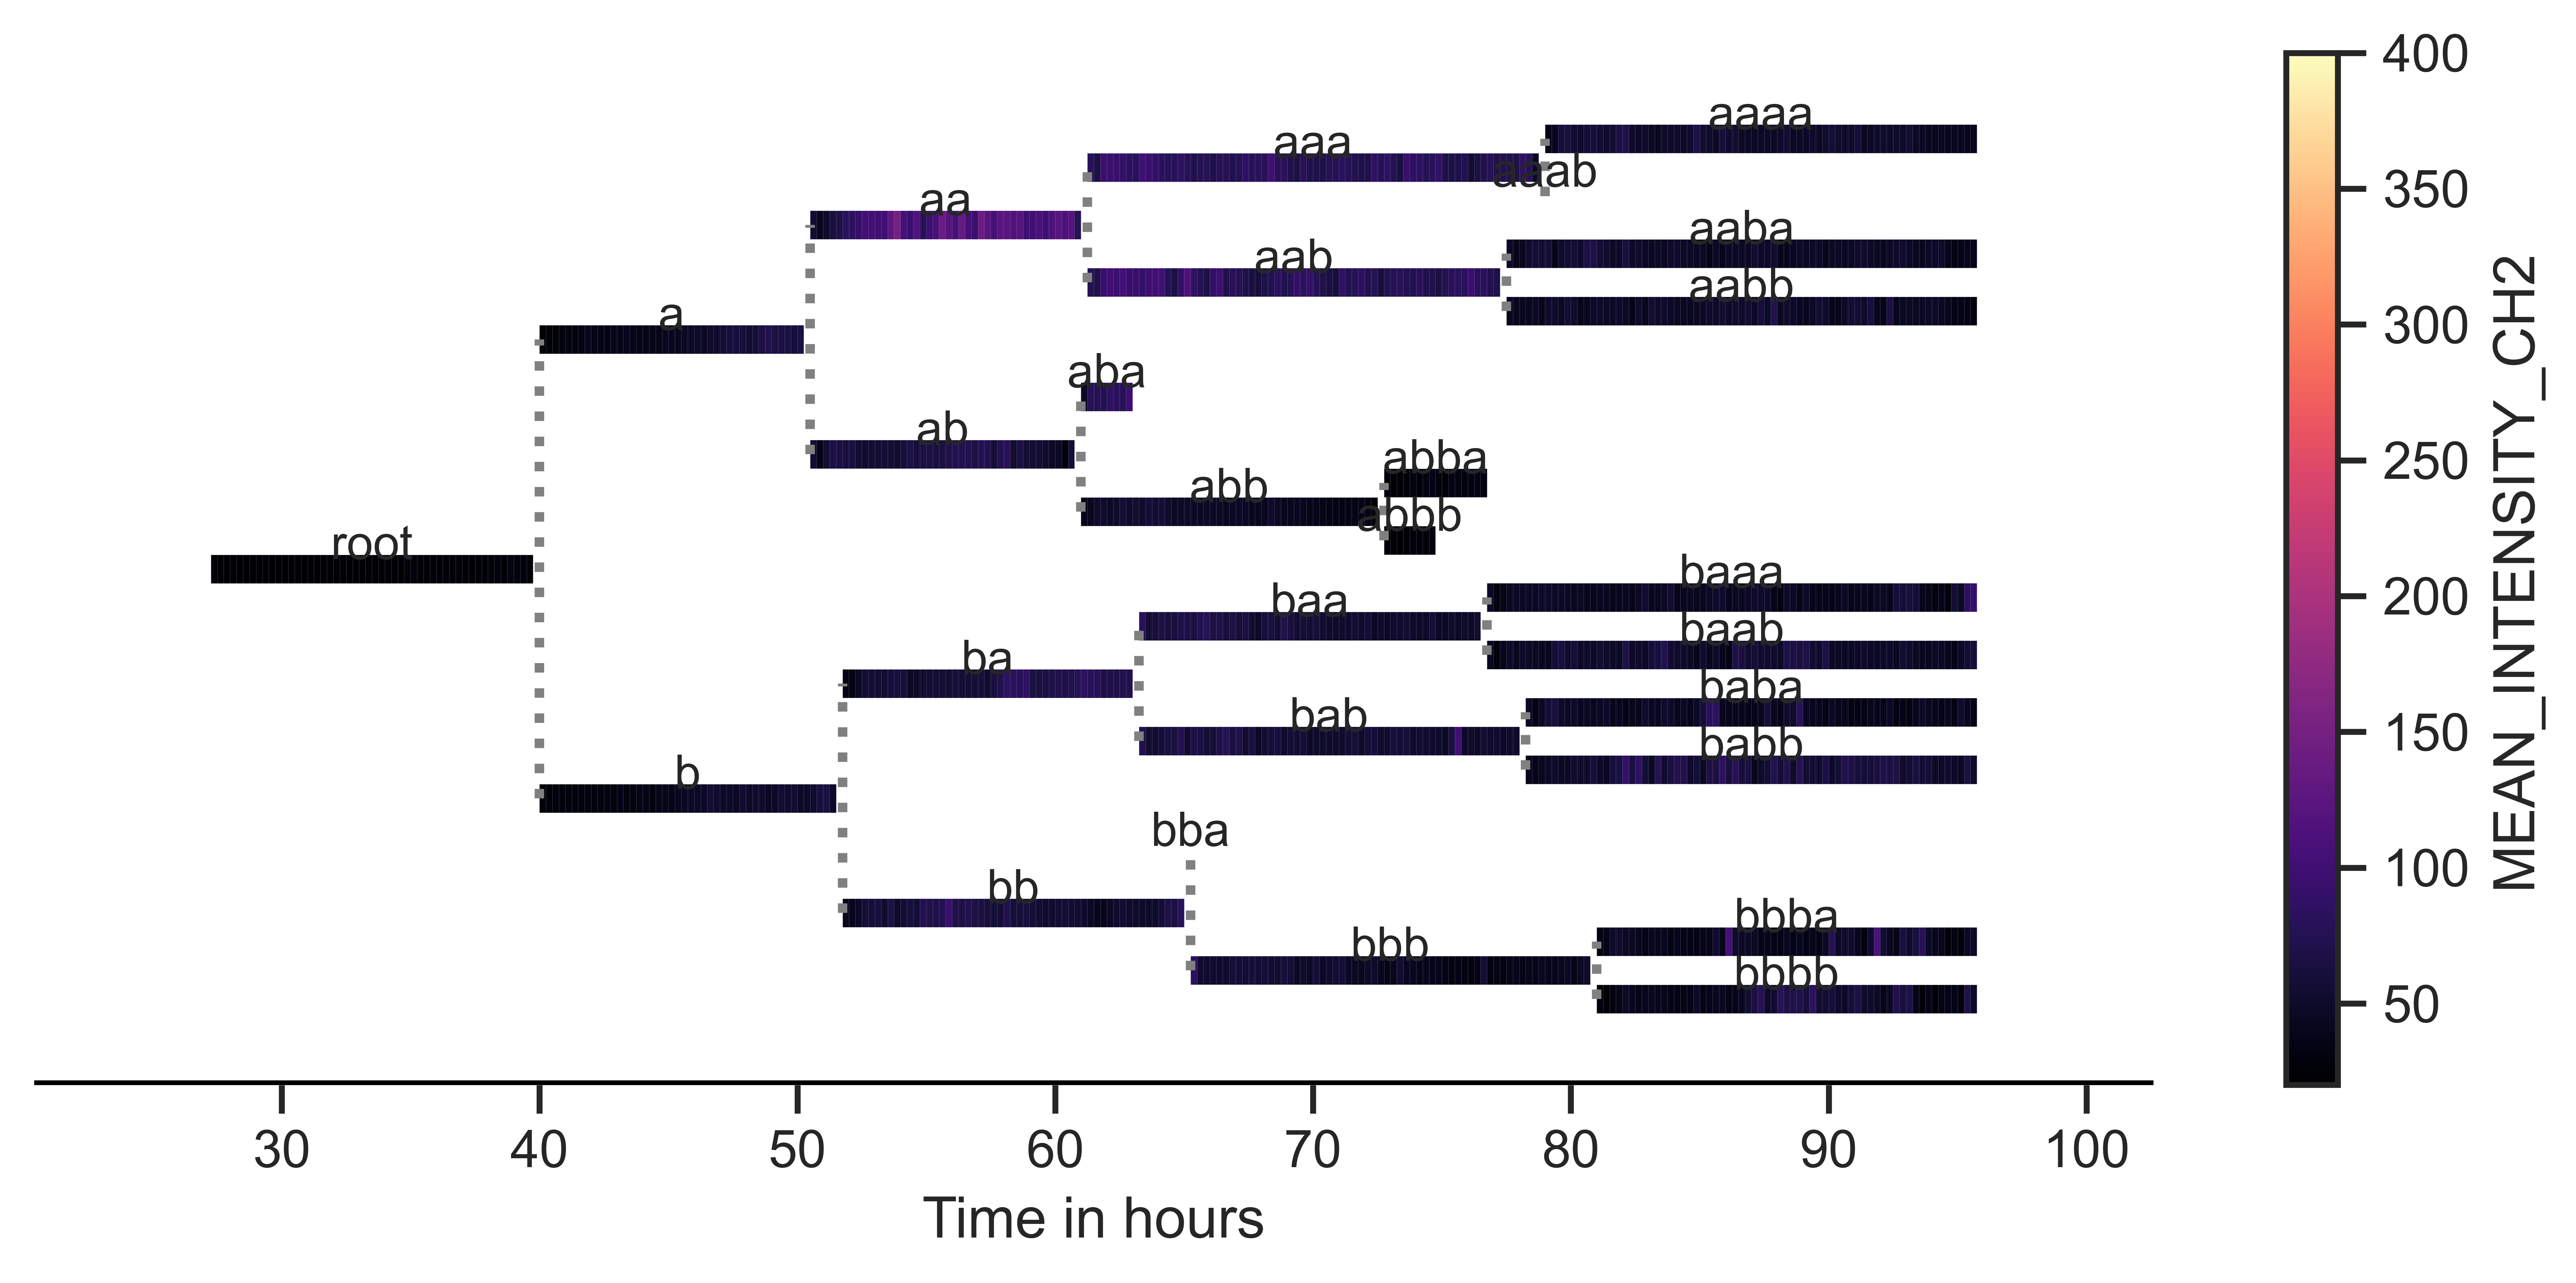

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.patches import PathPatch
import seaborn as sns
from matplotlib.lines import Line2D

# Assuming you have trackmate_data_manual DataFrame
# Assuming you have track_start DataFrame with 'Time_hours', 'branch_pos', 'ymin_list', 'ymax_list'

# Set seaborn style
sns.set(style="ticks")

variable = 'MEAN_INTENSITY_CH2'
width = 6
pal = "magma"
n_colors = 1000

min_intensity = 20
max_intensity = 400

# Determine the range of values for 'MEAN_INTENSITY_CH2' across all branches
#min_intensity = trackmate_data_manual[variable].min()
#max_intensity = trackmate_data_manual[variable].max()

# Create a color map with a gradient from red to blue and shared color scale
cmap = ListedColormap(sns.color_palette(pal, n_colors=n_colors))

# Create a figure with specified size and DPI
plt.figure(figsize=(10, 4), dpi=1000)

# Create a subplot
ax = plt.gca()

for x in trackmate_data_manual['branch'].unique():
    # Create a DataFrame for the current branch
    df = trackmate_data_manual.loc[trackmate_data_manual['branch'] == x]

    points = np.array(df[['Time_hours', 'branch_pos']]).reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, linewidth=width, norm=Normalize(min_intensity, max_intensity))
    lc.set_array(df[variable])

    # Add the LineCollection to the same set of axes
    ax.add_collection(lc)

    # Set rounded capstyle for each line segment
    for path in lc.get_paths():
        pathpatch = PathPatch(path, facecolor='none', edgecolor='none')
        pathpatch.set_capstyle('round')
        ax.add_patch(pathpatch)

    # Annotate branch label above each branch
    branch_label = df['branch'].iloc[0]  # Assuming the branch label is the same for all rows in the branch
    ax.annotate(branch_label, xy=(df['Time_hours'].mean(), df['branch_pos'].max()), ha='center', va='bottom', fontsize=10)

# Set custom axis limits
x_min = trackmate_data_manual['Time_hours'].min()
x_max = trackmate_data_manual['Time_hours'].max()
y_min = trackmate_data_manual['branch_pos'].min()
y_max = trackmate_data_manual['branch_pos'].max()

# Add some buffer to the limits
x_buffer = 0.1 * (x_max - x_min)
y_buffer = 0.1 * (y_max - y_min)

ax.set_xlim(x_min - x_buffer, x_max + x_buffer)
ax.set_ylim(y_min - y_buffer, y_max + y_buffer)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))

# Add colorbar to the plot
cbar = plt.colorbar(lc, ax=ax, orientation='vertical')
cbar.set_label(variable)

plt.xlabel("Time in hours")

# Add vertical lines
plt.vlines(x=track_start.Time_hours.unique().tolist(), 
           ymin=ymin_list, ymax=ymax_list, linewidth=2, linestyle=':', color='grey')

plt.show()

In [18]:
##PRUNING

#remove_branches that begin with.

# Assuming 'branches' is the correct column name
# Replace 'branches' with the actual column name if it's different
prefixes_to_remove = ('ab', 'aaab','bba')

# Create a boolean mask to filter out rows
mask = ~trackmate_data_manual['branch'].str.startswith(prefixes_to_remove)

# Apply the mask to get the filtered DataFrame
trackmate_data_manual = trackmate_data_manual[mask]

In [19]:
def group_pairs_by_last_character(input_set):
    pairs = {}

    for item in input_set:
        key = item[:-1]  # Exclude the last character
        if key not in pairs:
            pairs[key] = [item]
        else:
            pairs[key].append(item)

    identical_pairs = []
    for pair in pairs.values():
        if len(pair) == 2 and pair[0][:-1] == pair[1][:-1]:
            identical_pairs.append(pair)

    return identical_pairs

In [20]:
All_lineages = trackmate_data_manual.branch.unique().tolist()
All_lineages.remove('root')
Generations = len(max(trackmate_data_manual.branch.unique() , key = len))

# Given sequences
sequences = All_lineages

input_set = sequences

result = group_pairs_by_last_character(input_set)
print(result)

[['a', 'b'], ['ba', 'bb'], ['aaa', 'aab'], ['baa', 'bab'], ['baab', 'baaa'], ['aaba', 'aabb'], ['baba', 'babb'], ['bbba', 'bbbb']]


In [21]:
def flatten(xss):
    return [x for xs in xss for x in xs]

In [22]:
#Finds sets with no pairing or sisters.

nosister = list(set(All_lineages) - set(flatten(result)))

In [23]:
scale = 2

# Define a function to calculate the value for a given sequence
def calculate_value(sequence):
    value = 0
    for i, char in enumerate(sequence):
        if char == 'a':
            value += 1 / (scale ** i)
        elif char == 'b':
            value -= 1 / (scale ** i)
    return value

In [24]:
# Create a list to store the values for each sequence
sequence_values_list = []

# Populate the values list
for seq in sequences:
    sequence_values_list.append(calculate_value(seq))

# Print the list of sequence values
print(sequence_values_list)
print(All_lineages)

[1.0, -1.0, 1.5, -0.5, -1.5, 1.75, 1.25, -0.25, -0.75, -1.75, -0.375, -0.125, 1.375, 1.125, -0.625, -0.875, 1.875, -1.625, -1.875]
['a', 'b', 'aa', 'ba', 'bb', 'aaa', 'aab', 'baa', 'bab', 'bbb', 'baab', 'baaa', 'aaba', 'aabb', 'baba', 'babb', 'aaaa', 'bbba', 'bbbb']


In [25]:
nosister = sorted(nosister, key=len)
nosister

for ns in nosister:

    indices = [index for index, element in enumerate(All_lineages) if element.startswith(ns)]
    previous_branch = [ns[0:len(ns)-1]][0]

    ns

    indices_ns = [index for index, value in enumerate(All_lineages) if value == ns]
    indices_prev = [index for index, value in enumerate(All_lineages) if value == previous_branch]
    diff = sequence_values_list[indices_ns[0]]-sequence_values_list[indices_prev[0]]

    for index in indices:
        sequence_values_list[index] = sequence_values_list[index] - diff




In [26]:
## mitosis
track_start = trackmate_data_manual.groupby(['LABEL']).min()
track_start = track_start.reset_index()

In [27]:
## mitosis
track_start = trackmate_data_manual.groupby(['LABEL']).min()
track_start = track_start.reset_index()
#End point
track_end = trackmate_data_manual.loc[trackmate_data_manual['POSITION_T']==383]




trackmate_data_manual.loc[trackmate_data_manual['branch']=='root', 'branch_pos'] = 0

for i in range(0, len(sequences)):
    
    trackmate_data_manual.loc[trackmate_data_manual['branch']==sequences[i], 'branch_pos'] = sequence_values_list[i]

trackmate_data_manual.loc[trackmate_data_manual['branch']=='root', 'generation'] = 0

root = trackmate_data_manual.loc[trackmate_data_manual['branch']=='root']
rest = trackmate_data_manual.loc[trackmate_data_manual['branch']!='root']

for i in rest['branch'].unique().tolist():
    
        
    rest.loc[rest['branch']==i, 'generation'] = len(i)
    
trackmate_data_manual = pd.concat([root, rest])


track_start = trackmate_data_manual.groupby(['LABEL']).min().reset_index()[1:]

track_start = track_start.reindex(track_start.branch.str.len().sort_values().index)


count=1
for r in result:
    track_start.loc[track_start['branch']==r[0], 'Sisters'] = f'sisters_{count}'
    track_start.loc[track_start['branch']==r[1], 'Sisters'] = f'sisters_{count}'
    
    count=count+1

track_start = track_start.dropna(axis=0)

ymin_list = list()
ymax_list = list()


for s in track_start.Sisters.unique():
    
    temp_ = track_start.loc[track_start['Sisters']==s]
    
    temp_a = temp_[temp_['branch'].str.endswith('a')]
    temp_b = temp_[temp_['branch'].str.endswith('b')]
    
    
    ymax_list.append(temp_a['branch_pos'])
    ymin_list.append(temp_b['branch_pos'])

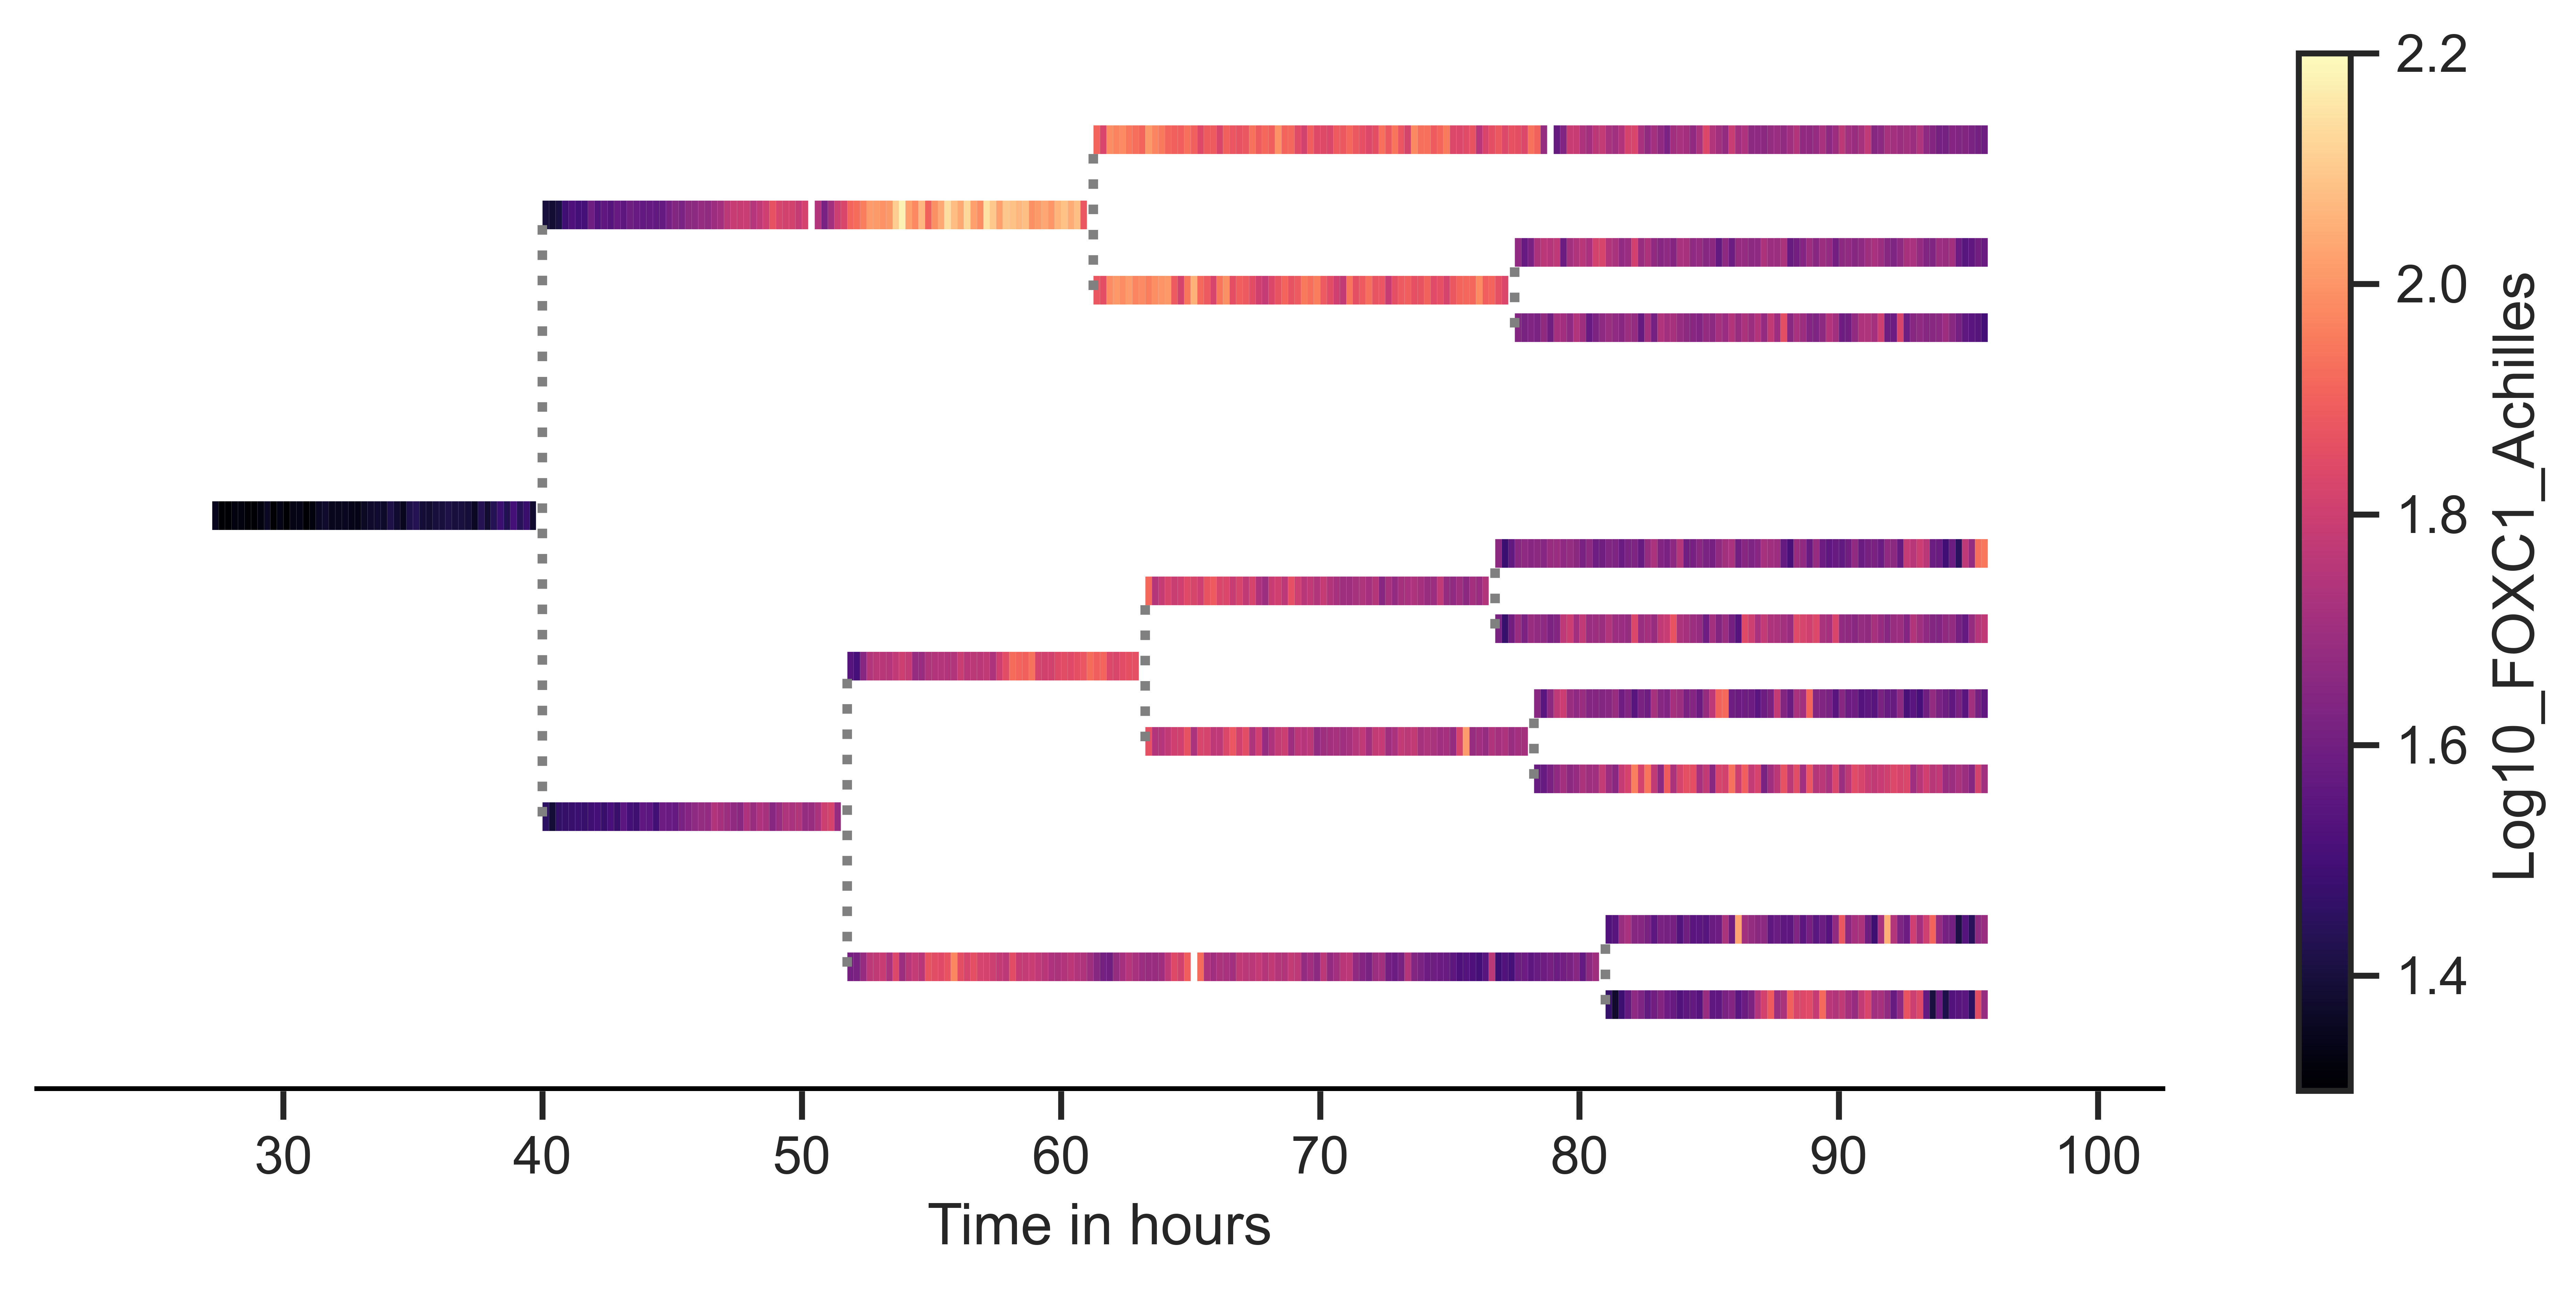

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.patches import PathPatch
import seaborn as sns
from matplotlib.lines import Line2D

# Assuming you have trackmate_data_manual DataFrame
# Assuming you have track_start DataFrame with 'Time_hours', 'branch_pos', 'ymin_list', 'ymax_list'


# Set seaborn style
sns.set(style="ticks")

variable = 'Log10_FOXC1_Achilles'
width = 6
pal = "magma"
n_colors = 1000


min_intensity = 1.3
max_intensity = 2.2


# Create a color map with a gradient from red to blue and shared color scale
cmap = ListedColormap(sns.color_palette(pal, n_colors=n_colors))

# Create a figure with specified size and DPI
plt.figure(figsize=(10, 4), dpi=1000)

# Create a subplot
ax = plt.gca()

for x in trackmate_data_manual['branch'].unique():
    # Create a DataFrame for the current branch
    df = trackmate_data_manual.loc[trackmate_data_manual['branch'] == x]

    points = np.array(df[['Time_hours', 'branch_pos']]).reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    lc = LineCollection(segments, cmap=cmap, linewidth=width, norm=Normalize(min_intensity, max_intensity))
    lc.set_array(df[variable])

    # Add the LineCollection to the same set of axes
    ax.add_collection(lc)

    # Annotate branch label above each branch
    #branch_label = df['branch'].iloc[0]  # Assuming the branch label is the same for all rows in the branch
    #ax.annotate(branch_label, xy=(df['Time_hours'].mean(), df['branch_pos'].max()), ha='center', va='bottom', fontsize=10)

# Set custom axis limits
x_min = trackmate_data_manual['Time_hours'].min()
x_max = trackmate_data_manual['Time_hours'].max()
y_min = trackmate_data_manual['branch_pos'].min()
y_max = trackmate_data_manual['branch_pos'].max()

# Add some buffer to the limits
x_buffer = 0.1 * (x_max - x_min)
y_buffer = 0.1 * (y_max - y_min)

ax.set_xlim(x_min - x_buffer, x_max + x_buffer)
ax.set_ylim(y_min - y_buffer, y_max + y_buffer)
ax.set_frame_on(False)
ax.get_xaxis().tick_bottom()
ax.axes.get_yaxis().set_visible(False)
xmin, xmax = ax.get_xaxis().get_view_interval()
ymin, ymax = ax.get_yaxis().get_view_interval()
ax.add_artist(Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=2))

# Add colorbar to the plot
cbar = plt.colorbar(lc, ax=ax, orientation='vertical')
cbar.set_label(variable)

Sisters_indices = [index for index, value in enumerate(All_lineages) if value not in nosister]
#selected_elements = [track_start.Time_hours.unique().tolist()[i] for i in Sisters_indices if i < len(track_start.Time_hours.unique().tolist())]

plt.vlines(x=track_start.Time_hours.unique().tolist(), 
           ymin=ymin_list, ymax=ymax_list, linewidth=2, linestyle=':', color='grey')

plt.xlabel("Time in hours")

# Add vertical lines

plt.savefig("Lineage_B4_P1_614.pdf")
plt.show()
